# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express wants to expand its subscriber base by analysing the actions of visitors to the newly created landing page on its website. This is to enable them understand their user's areas of interest and therefore use this to drive better engagement which ultimately will lead to getting them engaged long enough to make the decision to subscribe to E-news services. 

The objective is to explore the data so collected and carry out a statistical analysis to determine the effectiveness of the new landing page in gathering new subscribers for the organisation. The above is to be done by providing answers to the four questions asked.

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('C:\\Users\\Tayo Adeyo\\Downloads\\Module2_week3\\abtest.csv')  

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head() 

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail() 

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
df.shape

(100, 6)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().value_counts()

user_id  group  landing_page  time_spent_on_the_page  converted  language_preferred
False    False  False         False                   False      False                 100
dtype: int64

In [10]:
df.duplicated().value_counts()

False    100
dtype: int64

### Observations
The DataFrame has 6 columns as mentioned in the Data Dictionary section of the problem statement.  Data in each row corresponds to the user's interaction with the version of the landing page (old or new) allotted to them.

All the colums have the same number of observations - 100
There are no missing entries and there are no duplicates either.

The "time_spent_on_the_page" and the  "user_id" columns are numerical variables of type float64 and int64 respectively.

All the other columns are categorical variables and are read in as such.


### Univariate Analysis

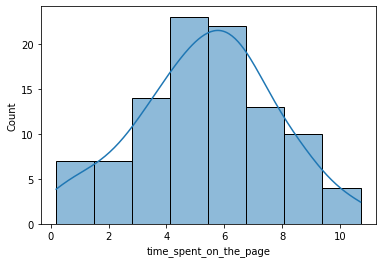

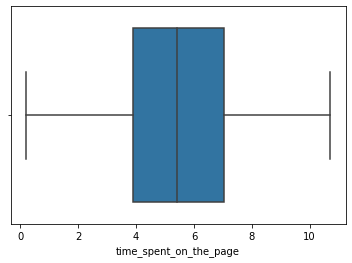

In [11]:
sns.histplot(data=df, x='time_spent_on_the_page', kde=True);
plt.show()
sns.boxplot(data=df, x='time_spent_on_the_page');
plt.show()

### Observation
Time spent the landing pages follows a normal distribution.

There are no outliers and the mean and median are almost the same at 5.38 and 5.42 respectively

In [12]:
df['group'].nunique()

2

In [13]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

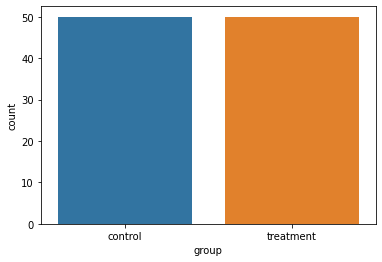

In [14]:
sns.countplot(data=df, x='group');

In [15]:
df['landing_page'].nunique()

2

In [16]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

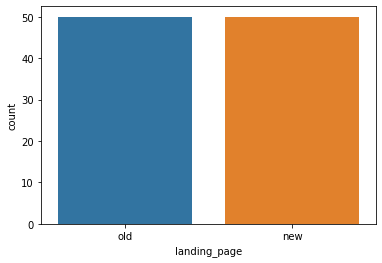

In [17]:
sns.countplot(data=df, x='landing_page');

In [18]:
df['converted'].nunique()

2

In [19]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

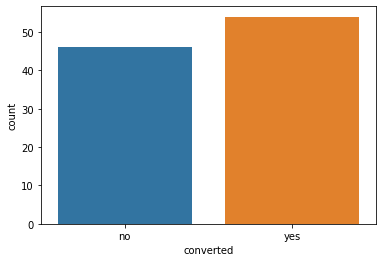

In [20]:
sns.countplot(data=df, x='converted');

In [21]:
df['language_preferred'].nunique()

3

In [22]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

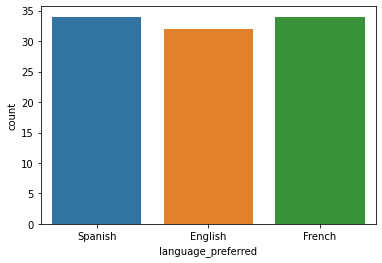

In [23]:
sns.countplot(data=df, x='language_preferred');

### Observation
The Users are divided into 2 equal groups, "Control" and "Treatment". Each group being 50 each.

There are two landing pages, "old" and "new" attached to the "control" and "Treatment" groups respectively.

The conversion rate graph shows that over half of the users (54) subscribed to the services after visiting either of the two landing pages.

The preferred language graph shows that there is almost no difference in the language of engagement amongst the 100 users sampled, with French and spanish having a slight edge with 34 users each and English with 32 users.

### Bivariate Analysis

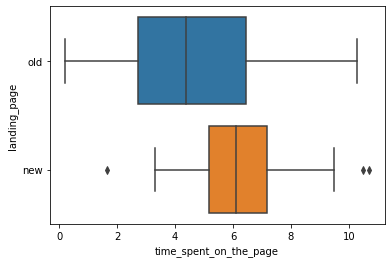

In [24]:
sns.boxplot(data=df, x = 'time_spent_on_the_page', y = 'landing_page');
plt.show()

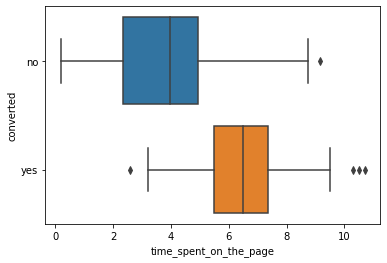

In [25]:
sns.boxplot(data=df, x = 'time_spent_on_the_page', y = 'converted');
plt.show()

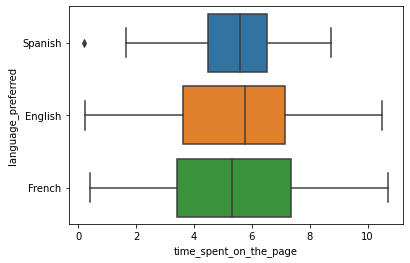

In [26]:
sns.boxplot(data=df, x = 'time_spent_on_the_page', y = 'language_preferred');
plt.show()

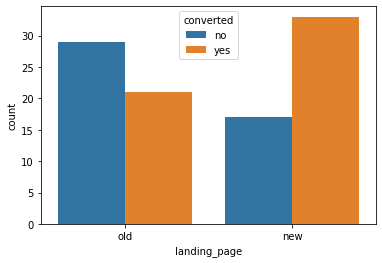

In [27]:
sns.countplot(data=df, x='landing_page', hue="converted");

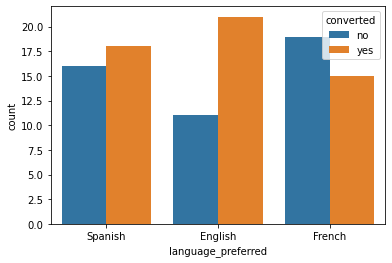

In [28]:
sns.countplot(data=df, x='language_preferred', hue="converted");

### Observation
On the average, users spend more time on the new landing page than on the old.

Users who get converted and then go ahead to subscribe to the services of E-news tend to spend more time on either of the two landing pages.

Average time spent on either of the two pages is similar for the different languages of engagement

More users gets converted on visiting the new landing page than those visiting the old.

A greater percentage of English language users gets converted than the other langusges of engagement.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Visual Analysis

In [29]:
# Create a new dataframe for users utilizing the "new" landing page - df_new_lp
df_new_lp = df[df['landing_page'] == 'new']

In [30]:
# Create a new dataframe for users utilizing the "old" landing page - df_old_lp
df_old_lp = df[df['landing_page'] == 'old']

In [31]:
# Total amount of time spent by all users on the new landing page
tt_new_lp = df_new_lp.time_spent_on_the_page.sum()
# Average time spent by users on the new landing page
ave_t_new_lp = df_new_lp.time_spent_on_the_page.mean()

# Total amount of time spent by all users on the old landing page
tt_old_lp = df_old_lp.time_spent_on_the_page.sum()
# average time spent by users on the old landing page
ave_t_old_lp = df_old_lp.time_spent_on_the_page.mean()

print("Average time spent on the new langing page is", round(ave_t_new_lp,2), "minutes, and total time is", tt_new_lp, "minutes")
print("Average time spent on the old langing page is", round(ave_t_old_lp,2), "minutes, and total time is", tt_old_lp, "minutes")

Average time spent on the new langing page is 6.22 minutes, and total time is 311.16 minutes
Average time spent on the old langing page is 4.53 minutes, and total time is 226.62000000000003 minutes


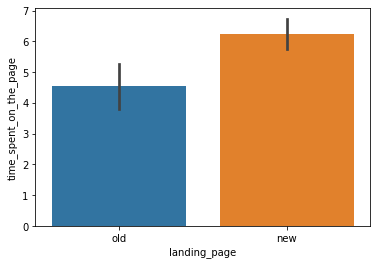

In [32]:
sns.barplot(data=df, x= 'landing_page', y='time_spent_on_the_page');
plt.show()

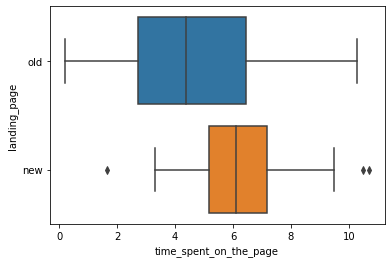

In [33]:
sns.boxplot(data=df, x = "time_spent_on_the_page", y = "landing_page");

### Step 1: Define the null and alternate hypotheses

We will test the Null hypothesis
>$H_0: \mu_1 = \mu_2 $  The users spend an equal amount of time on both landing pages.

Against the alternate hypothesis
>$H_a: \mu_1 > \mu_2 $  The users spend more time on the new landing page.


### Step 2: Select Appropriate test

In [34]:
sd_new_lp = df_new_lp.time_spent_on_the_page.std()
sd_old_lp = df_old_lp.time_spent_on_the_page.std()
print('Standard deviation of time spent on new landing page is', round(sd_new_lp,2))
print('Standard deviation of time spent on old landing page is', round(sd_old_lp,2))

Standard deviation of time spent on new landing page is 1.82
Standard deviation of time spent on old landing page is 2.58


Since we have two independent samples and we dont know the standard deviation ($\sigma$) of the population from which these samples are drawn, we can safely infer that these $\sigma$s are unequal since the calculated $\sigma$ of the drawn samples are unequal. We shall therefor proceed to use the: 

## "T-test for equality of means"

### The T-test assumptions are satisfied since

1. Continuous data? - Yes, time spent on the landing pages are measured on a continuos scale.
2. We have a normally distributed population. The sample plotted in the histogram in the univariate analysis follows a uniform distribution.
3. The sample standard deviations are unequal, therefore we can infer that the population standard deviations will be unequal
4. The samples were randomly drawn from the population.

### Step 3: Decide the significance level

We shall proceed to set our level of significance $\alpha$ at 5%

that is $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [35]:
#filter out the time spent on the old and new landing pages from their respective data frames
time_on_new_lp = df_new_lp.time_spent_on_the_page
time_on_old_lp = df_old_lp.time_spent_on_the_page
alpha = 0.05

### Step 5: Calculate the p-value

In [36]:
test_stat, p_value = stats.ttest_ind(time_on_new_lp, time_on_old_lp, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [37]:
# print the conclusion based on p-value
if p_value < alpha:
    print("As the p-value ", round(p_value,5), "is less than ", alpha, "the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value ", round(p_value,5), "is greater than ", alpha, "the level of significance, we fail to reject the null hypothesis.")


As the p-value  0.00014 is less than  0.05 the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the level of significance, we reject the null hypothesis. Hence, we have enough statistical evidence to say that users spend more time on the new langing page than on the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Visual analysis

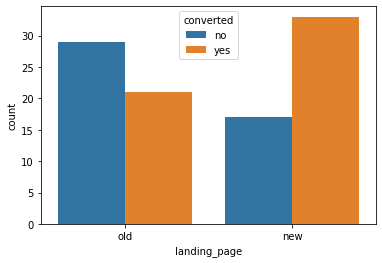

In [38]:
sns.countplot(data=df, x='landing_page', hue="converted");

In [39]:
df_new_lp.converted.value_counts()

yes    33
no     17
Name: converted, dtype: int64

In [40]:
df_old_lp.converted.value_counts()

no     29
yes    21
Name: converted, dtype: int64

### Step 1: Define the null and alternate hypotheses

We will test the Null hypothesis
>$H_0: P_1 = P_2 $  The proportion of users who gets converted is the same on visiting either the new or the old landing page.

against the alternate hypothesis
>$H_a: P_1 > P_2 $  The proportion of users who gets converted on visiting the new landing page is greater than those who gets converted on visiting the old landing page.

### Step 2: Select Appropriate test

Since the requirement is to compare the sample proportions from two populations, we shall use the: 
### Two Proportion Z-test

#### The Z-test assumptions are satisfied since:

1. Binomally distributed population - A user can only utilize either the new landing page or the old landing page.
2. The samples were randomly drawn from the population.
3. We need to check whether np and n(1-p) are greater than or equal to 10. Where n is our sample size, 50 in this case, and p is our sample proportion.

From Step1 above, we can see that:

33 out of 50 of the users visiting the new landing page are converted, 17 are not converted

21 out of 50 of the users visiting the old landing page are converted, 29 are not converted

For the new landing page:
>$np_1 = 50\times\frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \times\frac{(50-33)}{50} =17 \geq 10$

And for the old landing page:
>$np_2 = 50\times\frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \times\frac{(50-21)}{50} =29 \geq 10 $


### Step 3: Decide the significance level

We shall proceed to set our level of significance $\alpha$ at 5%

that is $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [41]:
# set up an array containing the conversion count for both landing pages
conversion_count = np.array([33, 21])

# set up an array containg the sample sizes for both landing pages
sample_size = np.array([50, 50])

alpha = 0.05

### Step 5: Calculate the p-value

In [42]:
# calculate the p-value
test_stat, p_value = proportions_ztest(conversion_count, sample_size)
print("The p-value is ", p_value)

The p-value is  0.016052616408112556


### Step 6: Compare the p-value with 𝛼


In [43]:
# print the conclusion based on p-value
if p_value < alpha:
    print("As the p-value ", round(p_value,3), "is less than ", alpha, "the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value ", round(p_value,3), "is greater than ", alpha, "the level of significance, we fail to reject the null hypothesis.")


As the p-value  0.016 is less than  0.05 the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is less than the level of significance, we reject the null hypothesis. We have enough statistical evidence to say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new landing page is greater than the conversion rate for the old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Visual Analysis

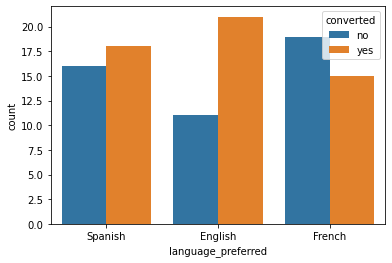

In [44]:
sns.countplot(data=df, x='language_preferred', hue="converted");

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language of engagement.

against the alternate hypothesis

>$H_a:$ Conversion is dependent on preferred language of engagement.


### Step 2: Select Appropriate test

Because we need to do a check to see if two categorical variables from a population are independent, we shall use the:
### Chi-square Test of Independence

#### The Chi-square Test  assumptions are satisfied since:

1. We are dealing with two categorical variables.
2. The number of sample observations in each level of the variable is greater than 5.
3. The samples were randomly drawn from the population.


### Step 3: Decide the significance level

We shall proceed to set our level of significance $\alpha$ at 5%

that is $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [45]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.language_preferred, df.converted)
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [46]:
# find the p-value
chi, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with 𝛼

In [47]:
# print the conclusion based on p-value
if p_value < alpha:
    print("As the p-value ", round(p_value,3), "is less than ", alpha, "the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value ", round(p_value,3), "is greater than ", alpha, "the level of significance, we fail to reject the null hypothesis.")


As the p-value  0.213 is greater than  0.05 the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the level of significance, we fail to reject the null hypothesis. We have enough statistical evidence to say that conversion and preferred language are independent of each other.

## 4. Is the time spent on the new page same for the different language users?

### Visual analysis

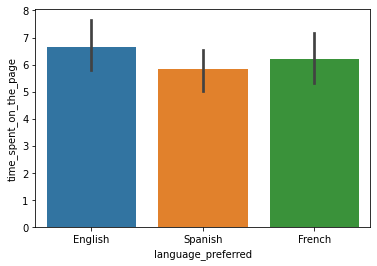

In [48]:
sns.barplot(data=df_new_lp, x = "language_preferred", y = "time_spent_on_the_page");

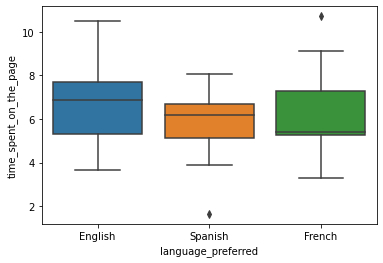

In [49]:
sns.boxplot(data=df_new_lp, x = "language_preferred", y = "time_spent_on_the_page");

In [50]:
# Create separate dataframes for the different language of engagement on the new landing page.
# French users
df_new_lpfr = df_new_lp[df_new_lp["language_preferred"]=="French"]
# Spanish users
df_new_lpsp = df_new_lp[df_new_lp["language_preferred"]=="Spanish"]
# English users
df_new_lpen = df_new_lp[df_new_lp["language_preferred"]=="English"]

In [51]:
# Time spent on landing page by French users
tt_fr = df_new_lpfr['time_spent_on_the_page'].sum()
mt_fr = df_new_lpfr['time_spent_on_the_page'].mean()
var_fr = df_new_lpfr['time_spent_on_the_page'].var()

# Time spent on landing page by Spanish users
tt_sp = df_new_lpsp['time_spent_on_the_page'].sum()
mt_sp = df_new_lpsp['time_spent_on_the_page'].mean()
var_sp = df_new_lpsp['time_spent_on_the_page'].var()

# Time spent on landing page by English users
tt_en = df_new_lpen['time_spent_on_the_page'].sum()
mt_en = df_new_lpen['time_spent_on_the_page'].mean()
var_en = df_new_lpen['time_spent_on_the_page'].var()

print("Time spent on New Landing page by French Users are:")
print("Total time spent: ", tt_fr)
print("Average time spent: ", round(mt_fr,2))
print("Variance: ", round(var_fr,2))

print("Time spent on New Landing page by Spanish Users are:")
print("Total time spent: ", tt_sp)
print("Average time spent: ", round(mt_sp,2))
print("Variance: ", round(var_sp,2))

print("Time spent on New Landing page by English Users are:")
print("Total time spent: ", tt_en)
print("Average time spent: ", round(mt_en,2))
print("Variance: ", round(var_en,2))

Time spent on New Landing page by French Users are:
Total time spent:  105.34
Average time spent:  6.2
Variance:  3.74
Time spent on New Landing page by Spanish Users are:
Total time spent:  99.2
Average time spent:  5.84
Variance:  2.33
Time spent on New Landing page by English Users are:
Total time spent:  106.62
Average time spent:  6.66
Variance:  3.94


### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3 $  The time spent on the new landing page is the same for the different language users

against the alternate hypothesis

>$H_a: \mu_1 \neq \mu_2$ or $\mu_1 \neq \mu_3$ or $\mu_2 \neq \mu_3 $  The time spent on the new landing page is not the same for at least one of the different language users

### Step 2: Select Appropriate test

Since we are required to compare the sample means from 3 independent populations, we shall use the:

### One-way ANOVA Test 

To ensure the reliability of our ANOVA test, we first make sure that the assumptions of normality and equality of variances are satisfied.

For the test of normality, Shapiro-Wilk’s test will be applied to the response variable.

For the test of equality of variance, Levene test will be applied to the response variable.

The response variable being "time_spent_on_the_page"

We shall use a level of significance value $\alpha\$ = 0.05 for both tests

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The "time_spent_on_the_page" follow a normal distribution

against the alternative hypothesis

>$H_a:$ The "time_spent_on_the_page" do not not follow a normal distribution

In [52]:
# Test of Normality Shapiro-Wilk’s test 

# We calculate our p-value from:
w, p_value = stats.shapiro(df_new_lp['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [53]:
# print the conclusion based on p-value
if p_value < alpha:
    print("As the p-value ", round(p_value,3), "is less than ", alpha, "the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value ", round(p_value,3), "is greater than ", alpha, "the level of significance, we fail to reject the null hypothesis.")


As the p-value  0.804 is greater than  0.05 the level of significance, we fail to reject the null hypothesis.


**Conclusion**

As the p-value is greater than the level of significance, we have enough statistical evidence to conclude that time spent on the new landing page follows a normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [54]:
# Test of equality of variance

# find the p_value
test_stat, p_value = stats.levene(df_new_lpfr['time_spent_on_the_page'],
                            df_new_lpsp['time_spent_on_the_page'],
                            df_new_lpen['time_spent_on_the_page'])
print('The p-value is', round(p_value,3))

The p-value is 0.467


In [55]:
# print the conclusion based on p-value
if p_value < alpha:
    print("As the p-value ", round(p_value,3), "is less than ", alpha, "the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value ", round(p_value,3), "is greater than ", alpha, "the level of significance, we fail to reject the null hypothesis.")


As the p-value  0.467 is greater than  0.05 the level of significance, we fail to reject the null hypothesis.


**Conclusion**

As the p-value is greater than the level of significance, we have enough statistical evidence to conclude that all the population variances are equal.

**The One-way Anova test assumptions are satisfied since:**

1. The response variable follows a normal distribution - Shapiro-Wilk's test
2. All the population variances are equal - Levene's test
3. The samples were randomly drawn from the population.


### Step 3: Decide the significance level

We shall proceed to set our level of significance $\alpha$ at 5%

that is $\alpha$ = 0.05

### Step 4: Collect and prepare data

**See Step 2**

### Step 5: Calculate the p-value

In [56]:
# Calculate the p-value using the f_oneway method
test_stat, p_value = stats.f_oneway(df_new_lpfr['time_spent_on_the_page'], 
                              df_new_lpsp['time_spent_on_the_page'], 
                              df_new_lpen['time_spent_on_the_page'])
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with 𝛼

In [57]:
if p_value < alpha:
    print("As the p-value ", round(p_value,3), "is less than ", alpha, "the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value ", round(p_value,3), "is greater than ", alpha, "the level of significance, we fail to reject the null hypothesis.")


As the p-value  0.432 is greater than  0.05 the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the level of significance, we fail to reject the null hypothesis. We have enough statistical evidence to say that the time spent on the new landing page is the same for the different language users

## Conclusion and Business Recommendations

1. Users spend more time on the new landing page than they do on the old landing page.

2. The proportion of users who gets converted on visiting the new landing page and therefore subscibe to the services of E-News is greater than those who get converted on visiting the old landing page. 

3. The language of engagement does not play any significant role in whether a visitor gets converted and therefore subscibes to the services of E-News.

4. There is also no significant difference in time spent on the new landing page using the different languages of engament.

It is therefore safe to recommend that management of E-News can phase out the old landing page and start serving all their users the new landing page with the different langusges of engagement.

### The folowing section was added for personal use.
#### This was to help in validating the answer to question #4

In [58]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_new_lp['time_spent_on_the_page'], groups = df_new_lp['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7434 -2.0035  1.069  False
English Spanish  -0.8285 0.3995 -2.3647 0.7078  False
 French Spanish  -0.3612 0.8326  -1.874 1.1516  False
-----------------------------------------------------


#### This test serves as proof of  correctness for the result arrived at in the One-way ANOVA test of equality of means carried out in question No4

All the means for time spent on the new landing page are similar for the different language users.